# Assignment4 

17011675 이원준

In [1]:
import pandas as pd
import numpy as np
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, SVD
import matplotlib.pyplot as plt
import seaborn as sns


from calldata.surprise_dataset import SupriseMovielensDataset, SurpriseDataset

## Load DataSet

```
SupriseMovielensDataset
/calldata/surprise_dataset.py
```

```py
class SurpriseDataset:

    def __init__(self, file_path):
        self.file_path = file_path
        self.df = pd.DataFrame()

    def __getitem__(self, i):
        return self.df.iloc[i]
```

```py
class SupriseMovielensDataset(SurpriseDataset):

    def __init__(self, file_path='./dataset/ml-100k/u.data'):
        super().__init__(file_path)
        reader = Reader(line_format='user item rating timestamp', sep='\t')
        self.data = Dataset.load_from_file(file_path, reader=reader)
        self.df = pd.DataFrame(self.data.raw_ratings, columns=['uid', 'iid', 'rate', 'timestamp'])
```

In [2]:
MovieLens = SupriseMovielensDataset('./dataset/ml-100k/u.data')

In [3]:
MovieLens[0]

uid                196
iid                242
rate                 3
timestamp    881250949
Name: 0, dtype: object

In [4]:
df = MovieLens.df
df

,uid,iid,rate,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
...,...,...,...,...
99995,880,476,3.0,880175444
99996,716,204,5.0,879795543
99997,276,1090,1.0,874795795
99998,13,225,2.0,882399156


### Trainset

In [5]:
trainset = MovieLens.data.build_full_trainset()

## 모든 유저 대상으로 predict

In [6]:
def predict_all(df, algo):
    est = np.zeros([len(df['uid'].unique()),len(df['iid'].unique())])
    real = np.zeros([len(df['uid'].unique()),len(df['iid'].unique())])
    
    for uid in df['uid'].unique():
        uid_df = df[df['uid']==uid]
        for iid, r_ui in zip(uid_df['iid'], uid_df['rate']):
            pred = algo.predict(uid, iid, r_ui)
            est[int(uid)-1][int(iid)-1] = pred.est
            real[int(uid)-1][int(iid)-1] = pred.r_ui
            
    return est, real

## KNN Basic

In [7]:
sim_options = {'name':'cosine', 'user_based': True}
algo = KNNBasic(k=40, min_k=1, sim_options=sim_options)

In [8]:
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [9]:
knn_basic_est, real = predict_all(df, algo)

In [10]:
knn_basic_est_df = pd.DataFrame(knn_basic_est)
knn_basic_est_df.index += 1
knn_basic_est_df.columns += 1

In [11]:
knn_basic_est_df.head()

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,4.075978,3.299221,3.476617,3.749661,3.273793,3.598576,4.04987,3.644355,4.450168,3.899959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.124882,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.748230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.074617,3.250579,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KNN With Means

In [12]:
sim_options = {'name':'cosine', 'user_based': True}
algo = KNNWithMeans(k=40, min_k=1, sim_options=sim_options)

In [13]:
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [14]:
knn_with_means_est, _ = predict_all(df, algo)

In [15]:
knn_with_means_est_df = pd.DataFrame(knn_with_means_est)
knn_with_means_est_df.index += 1
knn_with_means_est_df.columns += 1

In [16]:
knn_with_means_est_df.head()

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,3.876175,3.244212,3.495614,3.582471,3.250067,3.718176,3.810863,3.405191,4.234683,3.720384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.940083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.707510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.119817,2.585757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KNN With ZScore

In [17]:
sim_options = {'name':'cosine', 'user_based': True}
algo = KNNWithMeans(k=40, min_k=1, sim_options=sim_options)

In [18]:
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [19]:
knn_with_zscore_est, _ = predict_all(df, algo)

In [20]:
knn_with_zscore_est_df = pd.DataFrame(knn_with_zscore_est)
knn_with_zscore_est_df.index += 1
knn_with_zscore_est_df.columns += 1

In [21]:
knn_with_zscore_est_df.head()

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,3.876175,3.244212,3.495614,3.582471,3.250067,3.718176,3.810863,3.405191,4.234683,3.720384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.940083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.707510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.119817,2.585757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SVD

In [22]:
algo = SVD(n_factors=100, n_epochs=20, biased=False, lr_all=0.005, reg_all=0)

In [23]:
algo.fit(trainset)

In [24]:
svd_est, _ = predict_all(df, algo)

In [25]:
svd_est_df = pd.DataFrame(svd_est)
svd_est_df.index += 1
svd_est_df.columns += 1

In [26]:
svd_est_df.head()

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,4.419014,3.755336,2.816575,3.511839,2.781566,4.249849,4.172805,2.592824,4.342889,3.704657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.170657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.188271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.829218,2.874492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Comparison

In [27]:
real_df = pd.DataFrame(real)
real_df.index += 1
real_df.columns += 1

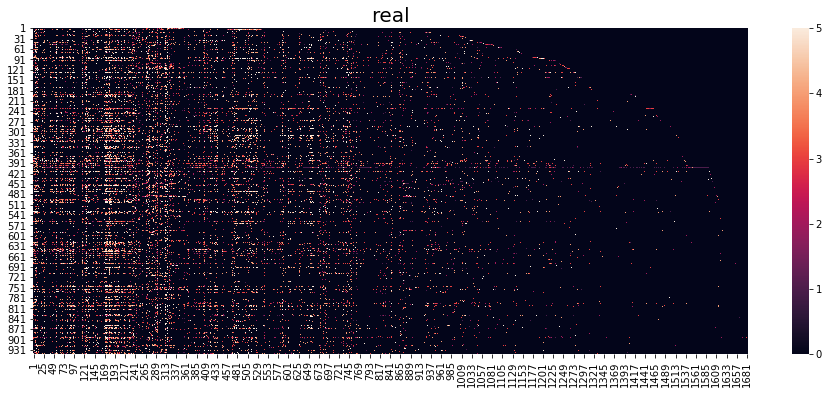

In [28]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(real_df)
plt.title('real', fontsize=20)
plt.show() 

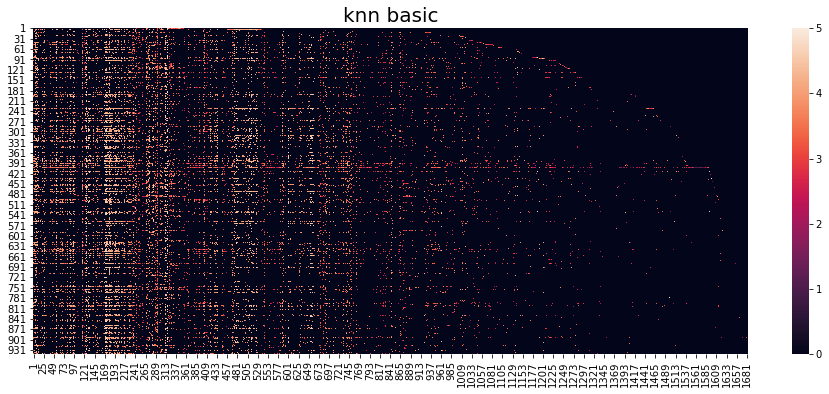

In [29]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(knn_basic_est_df)
plt.title('knn basic', fontsize=20)
plt.show()

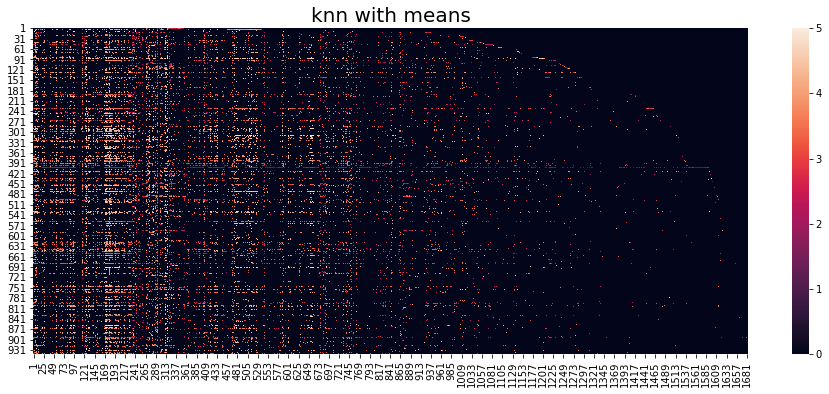

In [30]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(knn_with_means_est_df)
plt.title('knn with means', fontsize=20)
plt.show()

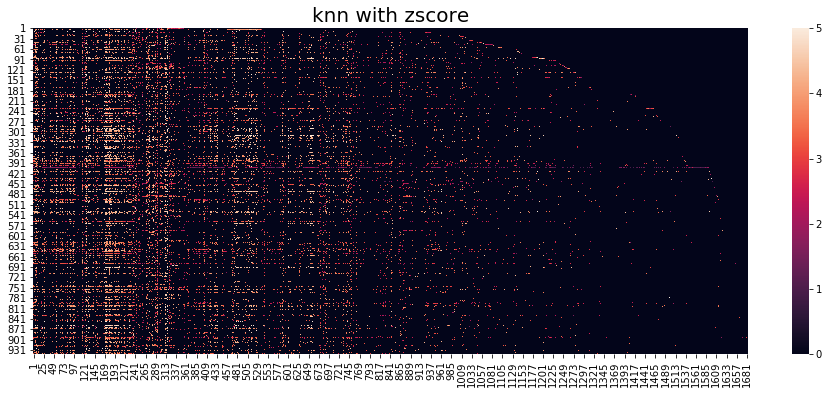

In [31]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(knn_with_zscore_est_df)
plt.title('knn with zscore', fontsize=20)
plt.show()

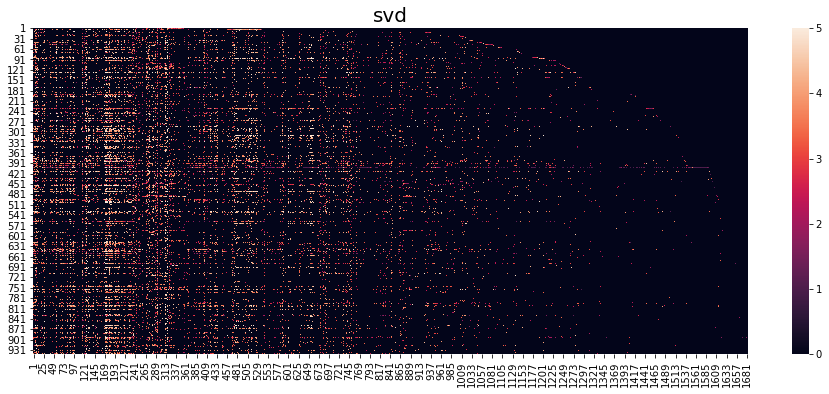

In [32]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(svd_est_df)
plt.title('svd', fontsize=20)
plt.show()